# TP 4 and Project

## Lagrange equations and sympletic integrators

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Newton (1630)
Newton’s 2nd law states that forces are proportional to second derivatives of position (i.e. acceleration), then
$$ F = m a$$
In a case of 1 degre of freedom, for a masse $m$ attached to a spring of constant $k$
$$m a = - k (x-x_0)$$
with $m=k=1$ and changing variables $q=x-x_0$ we have
$$ \ddot q = - q $$
We write then using $p = \dot q$
$$  \dot q = p$$
$$  \dot p = - q$$

### Lagrange (1760, 1788) 
found later an elegant way of treating such problems in general.
We suppose that the position of a mechanical system with $n$ degrees of freedom is described by 
$$q = (q_1, . . . , q_n)^T$$
as generalized coordinates (i.e. Cartesian coordinates, angles, arc lengths along a curve, etc.). The theory is then built upon two functions, an expression
$$T = T ( q , \dot q )$$ 
which represents the kinetic energy and by a function
$$U = U(q)$$
representing the potential energy. Then, after denoting by the *Lagrangian* the equation
$$L=T−U$$
the coordinates $q_1(t), . . . , q_n(t)$ obey the differential
equations
$$ \frac{d}{dt} (\frac{\partial L}{\partial \dot q}) - \frac{\partial L}{\partial q} =0$$
which constitute the Lagrange equations of the system. A numerical (or analytical) integration of these equations allows one to predict the motion of any such system from given initial values 

(“Ce sont ces équations qui serviront à déterminer la courbe décrite par le corps $M$ et sa vitesse à chaque instant”; Lagrange 1760).

- for the same problem with $𝑚=𝑘=1$ we have the kinetic energy $T = 1/2 \dot x^2$ and the potential energy $V = 1/2 (x-x_0)^2$
- and using still $q=x-x_0$ we have $$L = 1/2 \dot q^2 - 1/2 q^2$$
then
$$ \dot q + q  = 0$$
same as before.

### Hamilton (1834) 
simplified the structure of Lagrange’s equations and turned them into a form that has 
remarkable symmetry, by introducing Poisson’s variables, the conjugate momenta
$$ p_k = \frac{\partial L(q,\dot q)}{\partial \dot q_k}$$ for
 the Hamiltonian
$$H : = p \dot q − L ( q , \dot q)$$
as a function of p and q, taking $H = H(p,q)$ obtained by expressing $\dot q$ as a
function of $p$ and $q$. As $H = 1/2 p^2 + 1/2 q^2$ (the energy of the system), then
$$ \dot q =  \frac{\partial H}{\partial p}$$
$$ \dot p =  -\frac{\partial H}{\partial q}$$
same as before
$$  \dot q = p$$
$$  \dot p = - q$$

## Problem

We want to solve numerically and study the solutions of the following equation
$$ \dot y = f(y)$$ 
with $y = (q,p)^T$ and $f(y)=(p,-q)^T$ using various integrators, and for short and long integration times. 

We propose 4 integrators

- Euler $$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (p_n,- q_{n})$$
- Euler mid-point 
$$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (1/2) (p_n + p_{n+1} , -(q_n + q_{n+1}))$$
- Euler sympletic 
$$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (p_n,- q_{n+1})$$
- Verlet
    $$p_{aux} = p_n - 0.5  dt  q_n$$
    $$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (p_{aux},- 0.5 q_{n})$$
    
A symplectic integrator is a numerical integration scheme for Hamiltonian systems, as log as they conserve the areas in the espace phase they are applied to the calculations of long-term evolution of chaotic Hamiltonian systems from the Kepler problem to the classical and semi-classical simulations in molecular dynamics.
  

### 1 Euler integrator

(a) Write a function **euler_step(qn,pn,dt,f)** (see TP2) giving the next values of the Euler integrator

(b) Uses the following main function allowing to call all integrators


```python
def main(name,f,q0, p0, dt, t_max,t_ech=1.):
    q = q0
    p = p0
    t = 0.
    t_arr = np.array([t])
    p_arr = np.array([p0])
    q_arr = np.array([q0])
    te = 0.
    while t < t_max:
        t += dt
        te += dt
        (q, p) = name(q, p, dt,f)
        if (te > t_ech):
            t_arr = np.append(t_arr, t)
            q_arr = np.append(q_arr,q )
            p_arr = np.append(p_arr,p)
            te = 0.
    return (t_arr, q_arr, p_arr)
```

**Example**

*Model* 

```python
def ressort(q,p):
    return[p,-q]
```

*Call*

```python
dt = .01
t_ech = 0.01
t_max = 3*2*np.pi
q0 = 0.1
p0 = 0
(t_num_e, q_num_e, p_num_e) = main(euler_step,ressort,q0, p0, dt, t_max,t_ech)
```

You cal use this call structure for all integrators.


In [12]:
#(a)
def euler_step(qn,pn,dt,f):
    q = qn + dt * f(qn,pn)[0]
    p = pn + dt * f(qn,pn)[1]
    return [q,p]

In [13]:
#(b)
def main(name,f,q0, p0, dt, t_max,t_ech=1.):
    q = q0
    p = p0
    t = 0.
    te = 0.
    t_arr = np.array([t]) 
    p_arr = np.array([p0])
    q_arr = np.array([q0])
    while t < t_max:
        t += dt
        te += dt
        (q, p) = name(q, p, dt,f)
## append
        if (te > t_ech):
            t_arr = np.append(t_arr,t)
            q_arr = np.append(q_arr,q)
            p_arr = np.append(p_arr,p)
            te = 0.
    return (t_arr, q_arr, p_arr)

In [14]:
def ressort(q,p):
    return[p,-q]

In [33]:
# call
# call
dt = .0001
t_ech = 0.05
t_max = 10*2*np.pi
q0 = 0.1
p0 = 0
(t_num, q_num_e, p_num_e) = main(euler_step,ressort,q0, p0, dt, t_max,t_ech)

(c) Plots : you can analyse the results from two points of view

 - point dynamics : $(t,q(t))$
 - espace phase dynamics $(q(t),p(t))$ with $t$ as parameter
 
 For
 - short time integration 3 periods (period = $2 \pi$)
 - long time integration 20-40 periods
 
 as fonction of the time step $dt$.

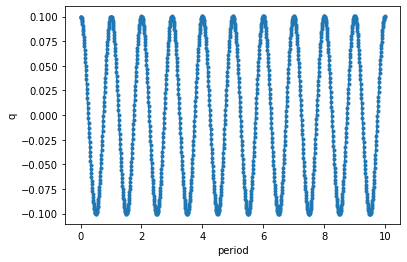

In [34]:
# plot 10 periods
plt.plot(t_num/(2.*np.pi), q_num_e, '.-', label='Methode Euler')
plt.xlabel('period')
plt.ylabel('q')
plt.show()

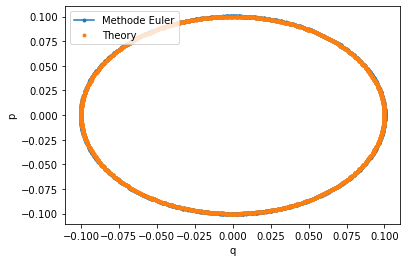

In [35]:
plt.plot(q_num_e,p_num_e, '.-', label='Methode Euler')
plt.plot(0.1*np.cos(t_num),0.1*np.sin(t_num),'.',label = 'Theory')
plt.xlabel('q')
plt.ylabel('p')
plt.legend(loc="upper left")
plt.show()

(d) Energy : the system is conservative then the energy $E$ must be constant along time. 
 - Compute $E = 1/2p^2 + 1/2 q^2$ and compare to the initial energy $E[0]=1/2p(0)^2 + 1/2 q(0)^2$. 
 - Found if possible the theorically the discrete energy at the step $n+1$ as function of the state $n$ $$E_{n+1}= C E_n$$. 
 - Compare $C(dt)$ ($C$ depends on $dt$) to the numerical ratio $$E_{n+1}/E_{n}$$
  For want to study the behaviour of the systme for
 - short time integration 3 periods (period = $2 \pi$)
 - long time integration 20-40 periods
 
 as fonction of the time step $dt$.

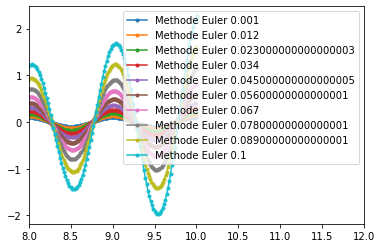

In [36]:
#dt
last = np.array([])
dtlst = np.array([])
for dt in np.linspace(0.001,0.1,10):
    (t_num, q_num_e, p_num_e) = main(euler_step,ressort,q0, p0, dt, t_max,t_ech)
    last = np.append(last,q_num_e[-1])
    dtlst = np.append(dtlst,dt)
    plt.plot(t_num/(2.*np.pi), q_num_e, '.-', label='Methode Euler '+np.str_(dt))
plt.xlim(8,12)
plt.legend()

(0.01, 0.1)

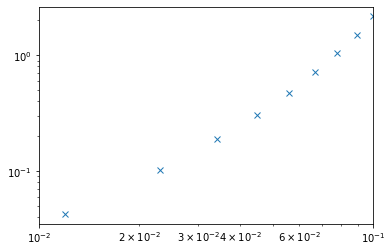

In [37]:
plt.plot(dtlst,last-last[0],"x")
plt.loglog()
plt.xlim(0.01,0.1)

In [38]:
# energy
E_e = (0.5*p_num_e**2 + 0.5*q_num_e**2)

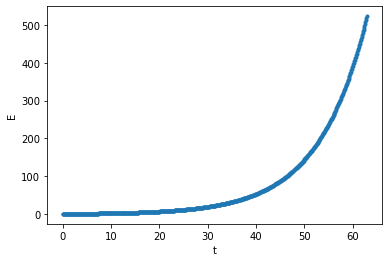

In [39]:
plt.plot(t_num, E_e/E_e[0], '.-', label='Methode Euler')
#plt.plot(np.cos(p_num),np.sin(p_num),'o')
plt.xlabel('t')
plt.ylabel('E')
plt.show()

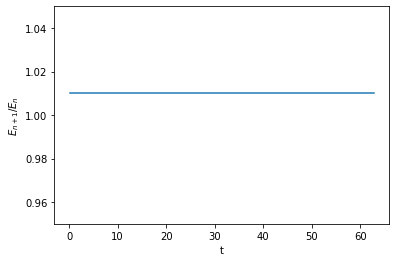

laste value = 1.0099999999999998
1.01


In [46]:
plt.plot(t_num[1:-1],E_e[1:-1]/E_e[0:-2])
plt.ylim(0.95,1.05)
plt.xlabel('t')
plt.ylabel('$E_{n+1}/E_n$')
plt.show()
print("laste value =",E_e[-1]/E_e[-2])
print((1+dt*dt))

### 2 Other integrators
Do the same for the three other integrators (Euler mid-point, Euler sympletic, Verlet) and present a comparaison between the different integrators in terms of time step, short and long simulations, energy, and other measurable you decide if you want.

In [48]:
def euler_mid_step(qn,pn,dt,f):
    q = (1 - dt**2/2) * qn + dt * f(qn,pn)[0]
    p = (1 - dt**2/2) * pn + dt * f(qn,pn)[1]
    return [q,p]

In [14]:
def euler_simp_step(qn,pn,dt,f):
    q = qn + dt * f(qn,pn)[0]
    p = pn + dt * f(q,pn)[1]
    return [q,p]

In [15]:
def verlet_step(qn,pn,dt,f):
    paux = pn + 0.5 * dt * f(qn,pn)[1]
    q = qn + f(qn,paux)[0]*dt
    p =  paux + 0.5*dt * f(q,paux)[1]
    return [q,p]

## Project

The project is composed of two parts 
- (mandatory) Compute and analyse a 3-bodys system
- (optional)  Compute and analyse a 5-bodys system

###   3-bodys system
We consider the Sun–Earth–Moon system, where for simplicity we neglect the other bodies and 
influences in the solar system. We represent the
positions of these three bodies at time t as 
$$ q_i(t)$$
where $i = 0$ corresponds to the Sun, $i = 1$ to the Earth, and $i = 2$ to the Moon.

From the Newton’s law of gravitation, we get a system of six differential equations ($(q_i,p_i)$)
to which we will apply our numerical schemes.

We want to study and analyse
- the behaviour for long time simulations
- the system stability 

## References
- Theory and data for the 3-bodies problem
    - Computing the long term evolution of the solar system with geometric numerical integrators
    Shaula Fiorelli Vilmart/Gilles Vilmart - https://hal.archives-ouvertes.fr/hal-01560573v2
- Theory and data for the 3-bodies problem
    - Geometric Numerical Integration - Ernst Hairer, Christian Lubich, Gerhard Wanner - Chapter 1

## Report and presentation
- a Jupyter sheet with problem statement, numerical schemes and results with analyse
- 5' talk + 5' questions oral presentation 
- Friday 9th December - morning

### Annexe : Animation

In [16]:
import matplotlib.animation as animation

In [17]:
# data
t = np.linspace(0,2.*np.pi,20)
xcos = np.cos(t)
ysin = np.sin(t)

<IPython.core.display.Javascript object>


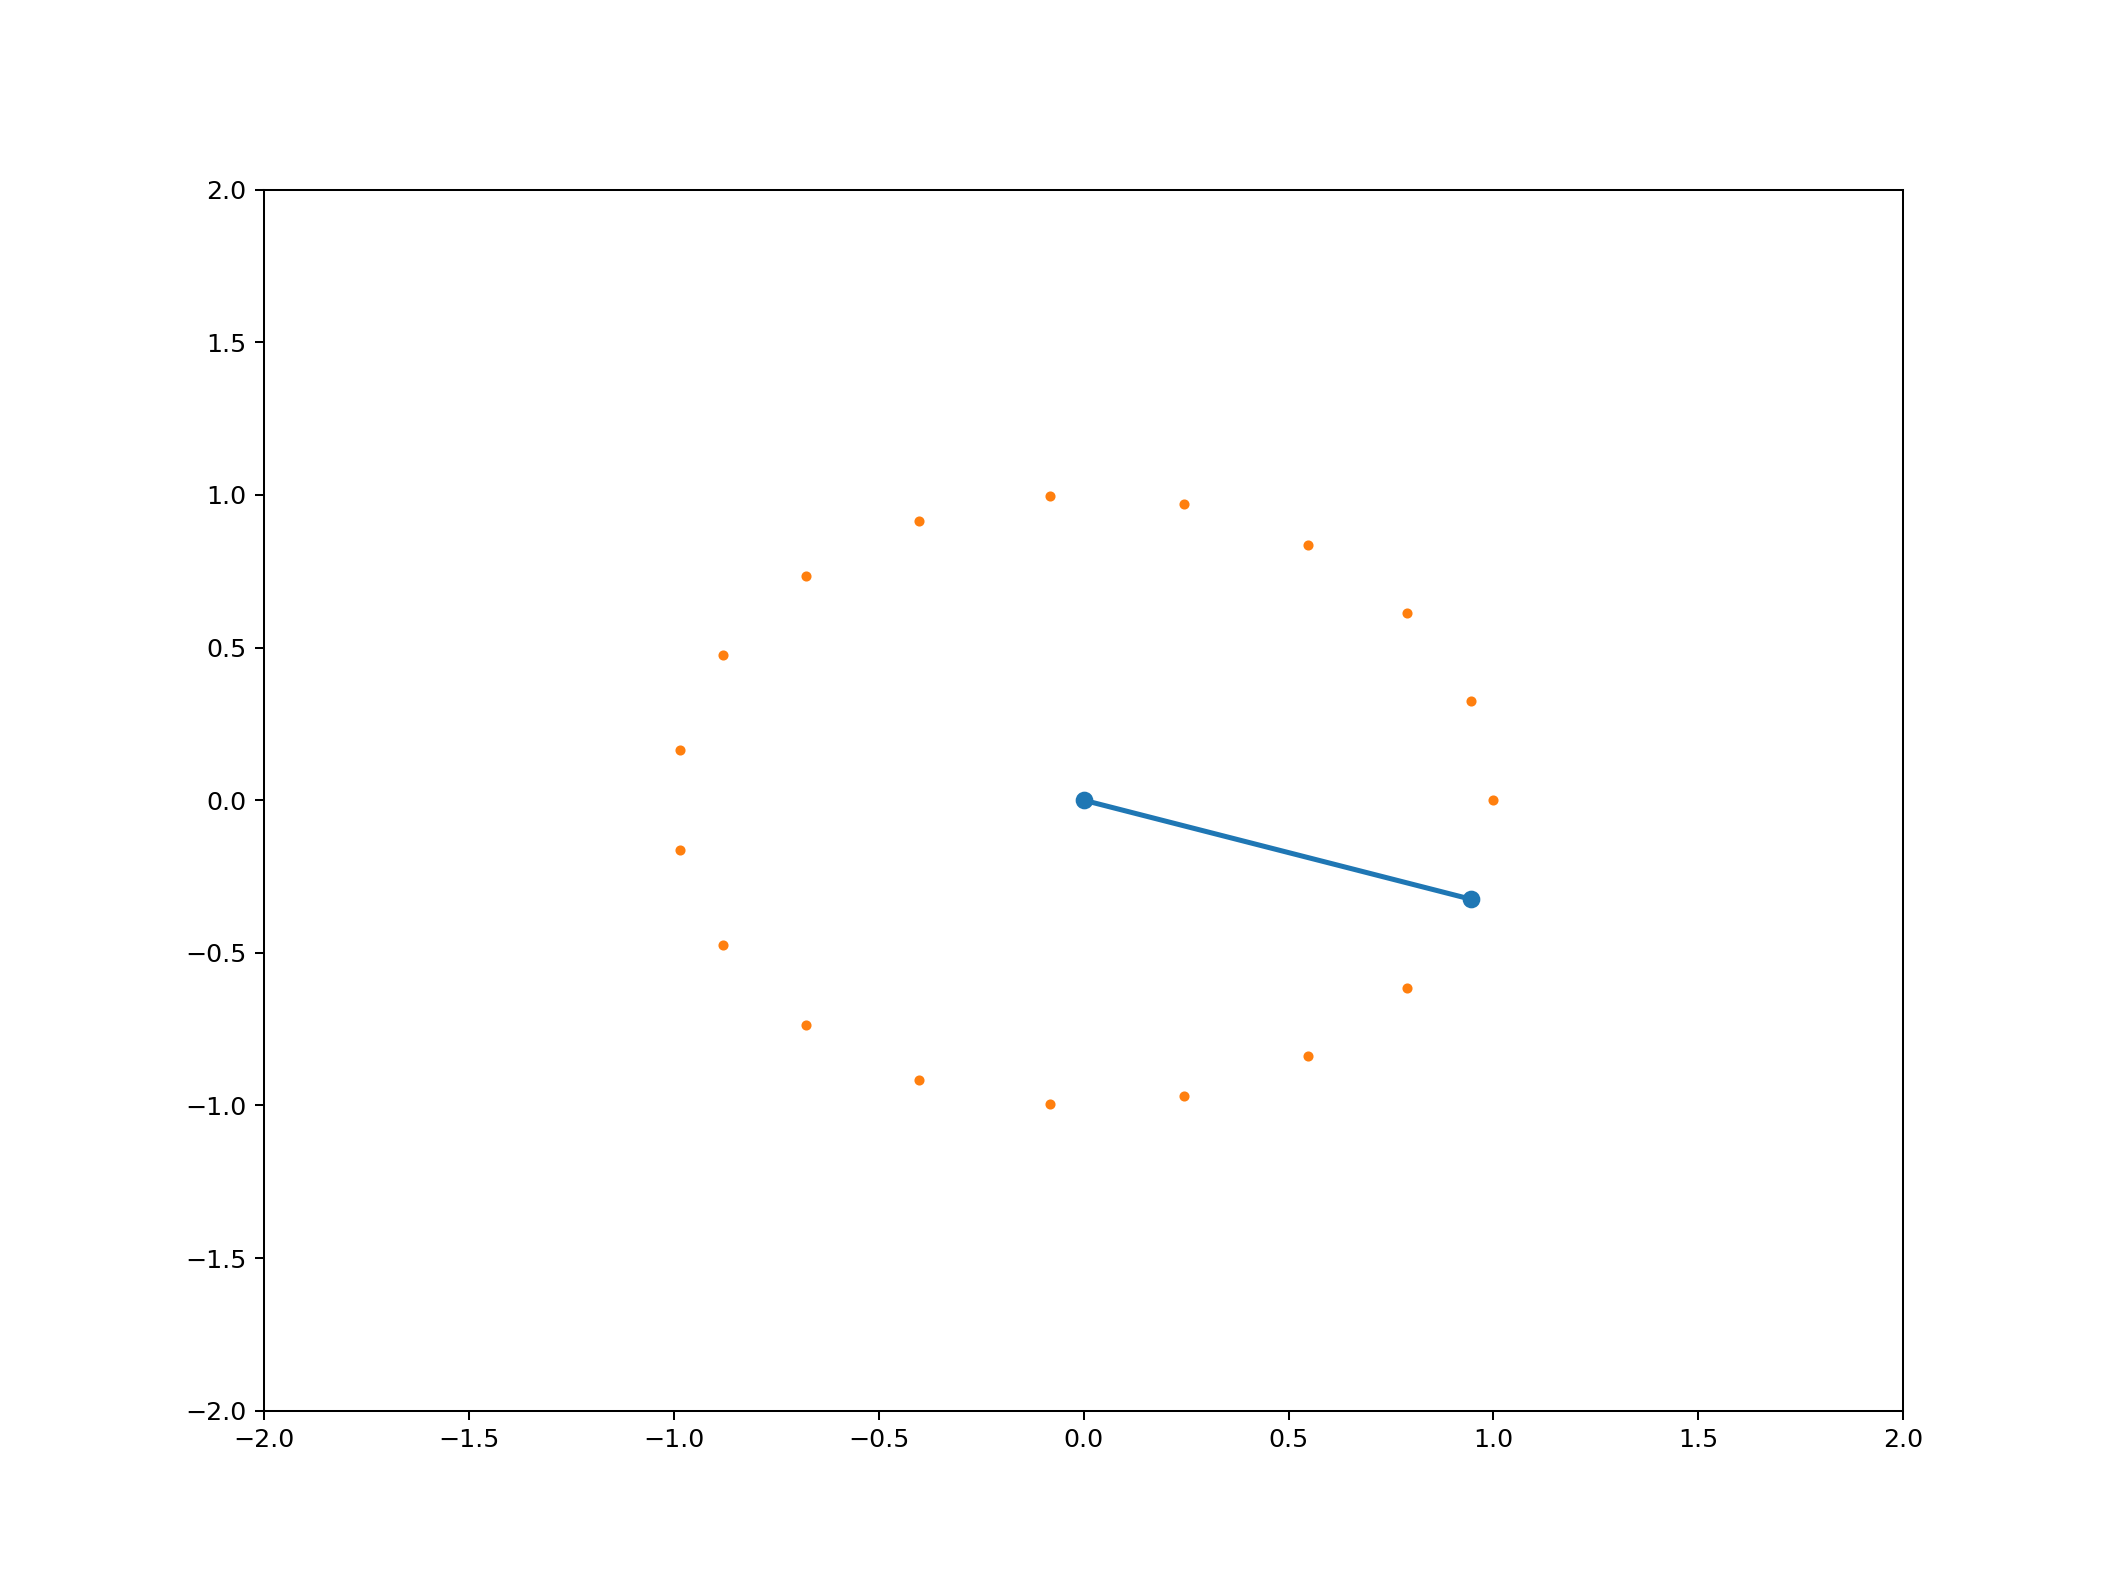

In [18]:
%matplotlib notebook
fig = plt.figure() # initialise la figure
line, =  plt.plot([], [], 'o-', lw=2)
line1, = plt.plot([], [],'.', lw=1) 
plt.xlim(-2, 2)
plt.ylim(-2, 2)

def animate(i): 
    x = [0,xcos[i]]
    y = [0,ysin[i]]
    x1 = xcos[0:i]
    y1 = ysin[0:i]
    line.set_data(x, y)
    line1.set_data(x1,y1)
    return line, line1

ani = animation.FuncAnimation(fig, animate, frames=len(t),interval=0.01*1000, blit=True)
plt.show()